<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Sep1-2/Actividad_2_de_agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

def costo(x, t, w):
  f=0
  f+=w[0]+(w[1]*x[0])+(w[2]*x[1])+(w[3]*x[2])+(w[4]*x[3]) #Funcion de L
  L=np.sum((f-t)**2)
  return L/(2*len(x))

def derivada(x, t, w):
  dw=np.zeros(len(w))
  aux=(costo(x,t,w))*2*len(x)
  for i in range(len(w)):
    if (i==0):
      dw[i]=aux
    if (i!=1):
      dw[i]=aux*(np.sum(x[i]))
  return dw/len(x)

def gradiente_descendente(x, t, w, alp, n_it):
  for i in range(n_it):
    d=derivada(x, t, w)
    for j in range(len(w)):
      w[j] = w[j] - alp * d[j] #Actualizado los w
  return w

def pol_reg(puntos,coefs): #Evaluar un polinomio
  sum=0
  var_dep=np.zeros(len(puntos))
  for j in range (0,len(puntos)):
    sum=0;
    for i in range (0,len(coefs)):
      sum+=coefs[i]*(puntos[j])**i
    var_dep[j]=sum;
  return var_dep

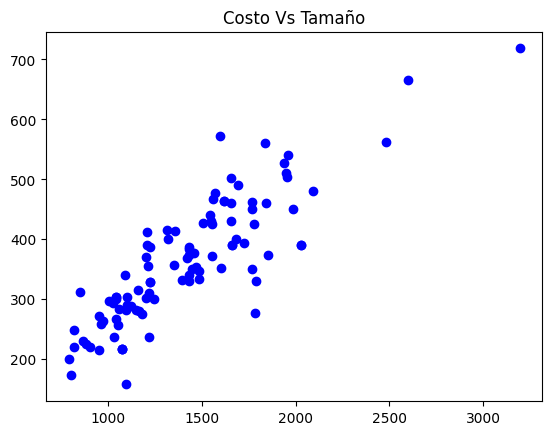

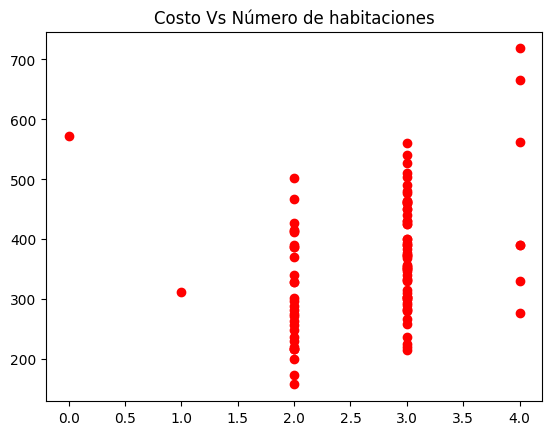

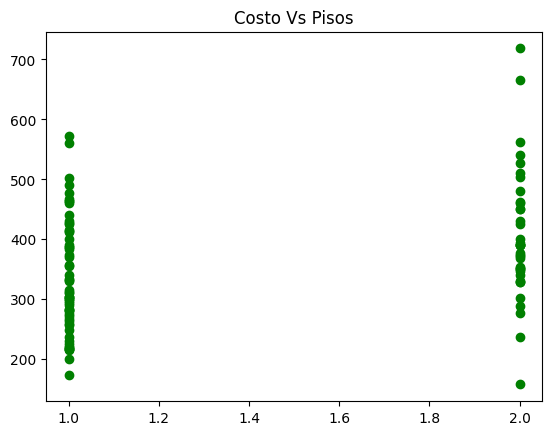

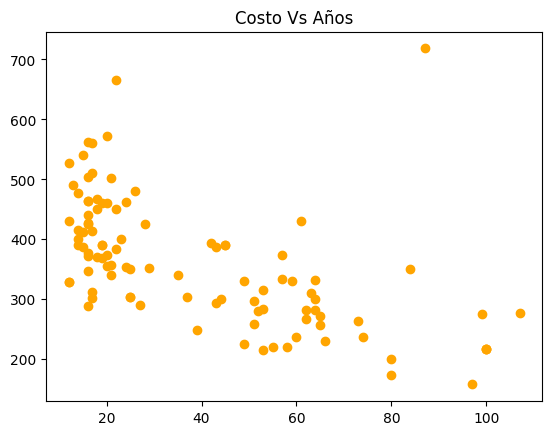

In [199]:
#Gráficas

houses=np.loadtxt("houses.txt",delimiter=",").T
Xh=houses[0:4]
th=houses[-1] #Costo de la casa
labels=["Tamaño,N. de habitaciones","Pisos","Años"]

plt.scatter(Xh[0],th,color="blue")
plt.title("Costo Vs Tamaño")
plt.show()

plt.scatter(Xh[1],th,color="red")
plt.title("Costo Vs Número de habitaciones")
plt.show()

plt.scatter(Xh[2],th,color="green")
plt.title("Costo Vs Pisos")
plt.show()

plt.scatter(Xh[3],th,color="orange")
plt.title("Costo Vs Años")
plt.show()

#De aquí notamos que el costo aumenta linealmente conforme aumenta el tamaño de la casa, de forma similar el costo disminute con los años

In [198]:
#Ajuste de modelo lineal

n_it=5000
w=np.zeros(5) #w0 y w1 para cada ajuste lineal

#Determino cada alp
alp=0.00001

A=np.zeros(5) #Coeficientes finales de w para cada ajuste
for i in range(4):
  A=gradiente_descendente(Xh,th,w,alp,n_it)
  plt.scatter(Xh[i][:],th)
  B=np.linspace(np.amin(Xh[i][:]),np.amax(Xh[i][:]),1000)
  plt.plot(B,pol_reg(B,A[i]),color="red")
  plt.show()


IndexError: ignored

In [ ]:
#Ajuste normalizado

for i in range (4):
 Xh[i]=(Xh[i]-np.mean(Xh[i]))/np.std(Xh[i]) #Normalizo x

alp=np.array([0.0000001,0.0001,0.0001,0.0001]) #Nuevos alphas

for i in range(4):
  A[i]=gradiente_descendente(Xh[i][:],th,w[i][:],alp[i],n_it) #Vuelvo a hacer grad descend
  plt.scatter(Xh[i],th)
  B=np.linspace(np.amin(Xh[i]),np.amax(Xh[i]),1000)
  plt.plot(B,pol_reg(B,A[i]),color="red")
  plt.show()

ValueError: ignored